<a href="https://colab.research.google.com/github/hinrlch/xuv_FTH_sim/blob/main/FTH_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**XUV Seminar - Problemt set 7**


---

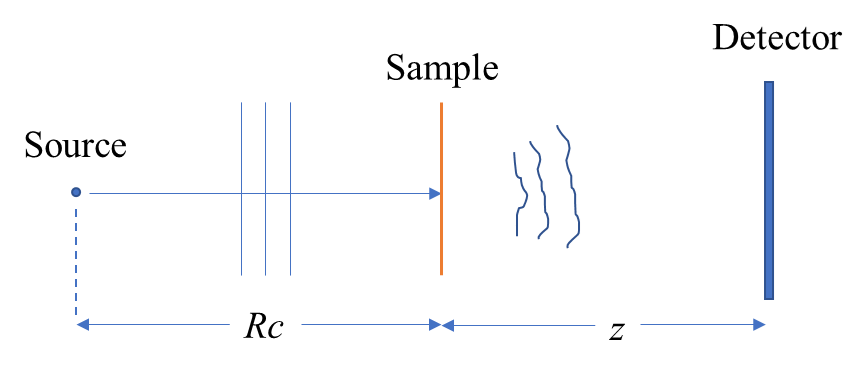




Setup parameters

Detector pixel-size = 11um

pixels = 2048x2048

Distance to detector z = 5 cm

Wavelength = 40 nm

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def ifft2c(array):
    """
    performs 2 - dimensional inverse Fourier transformation, where energy is reserved abs(G)**2==abs(fft2c(g))**2
    if G is two - dimensional, fft2c(G) yields the 2D iDFT of G
    if G is multi - dimensional, fft2c(G) yields the 2D iDFT of G along the last two axes
    :param array:
    :return:
    """
    return np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(array), norm='ortho'))


def fft2c(array):
    """
    performs 2 - dimensional unitary Fourier transformation, where energy is reserved abs(g)**2==abs(fft2c(g))**2
    if g is two - dimensional, fft2c(g) yields the 2D DFT of g
    if g is multi - dimensional, fft2c(g) yields the 2D DFT of g along the last two axes
    :param array:
    :return:
    """
    return np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(array), norm='ortho'))

# Setup parameters
wavelength = 40e-9
# distance to sensor
z=5e-2
# pixel size detector
dxd= 11e-6
# number of pixels
N = 2048

In [3]:
# calculates pixel size in object-plane
dxo = wavelength * z / (N * dxd)

# size of pinholes (diameter)
P1 = (565-483)*dxo
P2 = (1526-1508)*dxo
P3 = (1040-1006)*dxo
#size of object (W*H)
Width = (1184-890)*dxo
Heigth= (1065-979)*dxo

print(f'pinhole sizes\nP1 = {P1*1e6:.2E} um\nP2 = {P2*1e6:.2E} um\nP3 = {P3*1e6:.2E} um\n'+
      f'Object size:\nWidth = {Width*1e6:.2E} um\nHeigth = {Heigth*1e6:.2E} um\n')

pinhole sizes
P1 = 7.28E+00 um
P2 = 1.60E+00 um
P3 = 3.02E+00 um
Object size:
Width = 2.61E+01 um
Heigth = 7.63E+00 um



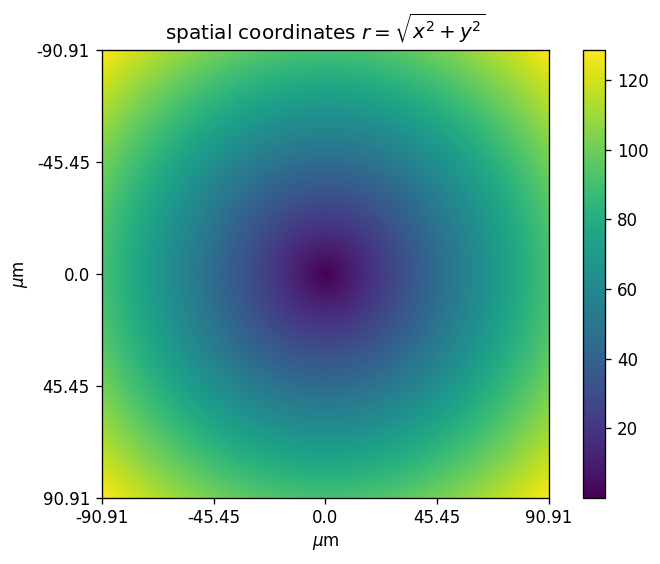

In [4]:
# creates spatial coordinates
x = np.linspace(-N//2, N//2, N)*dxo
X,Y = np.meshgrid(x,x)

plt.figure(dpi=120)
plt.title(r'spatial coordinates $r=\sqrt{x^2+y^2}$')
plt.imshow(np.sqrt(X**2 + Y**2)*1e6, )
plt.xticks(ticks=np.linspace(0,N,5), labels=np.around(np.linspace(-N//2,N//2,5)*dxo*1e6, decimals=2))
plt.yticks(ticks=np.linspace(0,N,5), labels=np.around(np.linspace(-N//2,N//2,5)*dxo*1e6, decimals=2))
plt.xlabel(r'$\mu$m')
plt.ylabel(r'$\mu$m')
plt.colorbar()
plt.tight_layout()
plt.show()

$$\text{(Paraxial approximation) Spherical wave} = \exp\left[ik\frac{r^2}{2R_c} \right]$$

In [ ]:
# Creates plane-wave illumination
Rc = 5e-1 # [50cm, 5cm, 5mm, 1mm] # radius of curvature
illumination = np.exp(1j*(2*np.pi/wavelength)*(X**2+Y**2)/(2*Rc))
nPhotons = 10e9
illumination *= nPhotons / np.sqrt(np.sum(np.abs(illumination)))

plt.figure(dpi=120)
plt.title('Illuminating beam phase (rad)')
plt.imshow(np.angle(illumination), cmap='hsv', vmin=-np.pi, vmax=np.pi)
plt.xticks(ticks=np.linspace(0,N,5), labels=np.around(np.linspace(-N//2,N//2,5)*dxo*1e6, decimals=2))
plt.yticks(ticks=np.linspace(0,N,5), labels=np.around(np.linspace(-N//2,N//2,5)*dxo*1e6, decimals=2))
plt.xlabel(r'$\mu$m')
plt.ylabel(r'$\mu$m')
plt.colorbar()
plt.tight_layout()
plt.show()



In [18]:
import os
os.getcwd()


'/content'

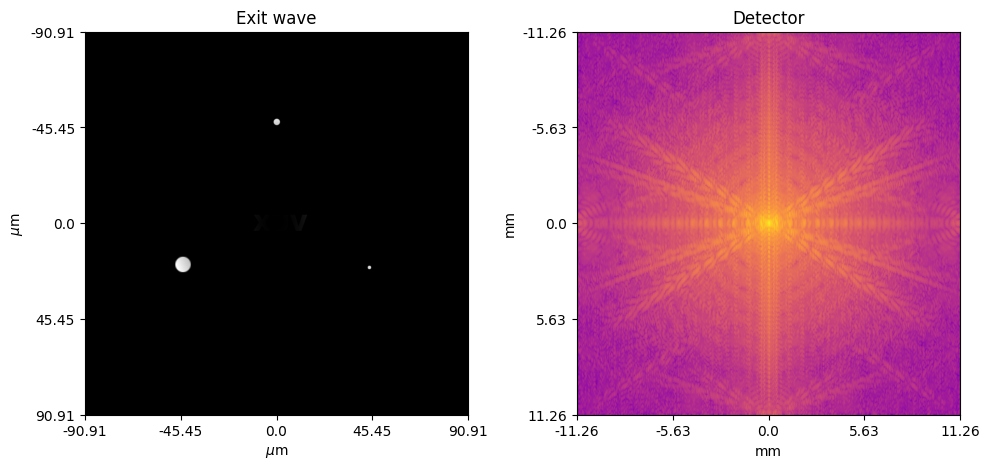

In [14]:
# Construct Exit wave and propagate to detector
my_object = plt.imread('XUV0.png').mean(axis=-1)
my_object /= np.amax(my_object)
Exit_wave = illumination * my_object
measured = np.square(np.abs((fft2c(Exit_wave))))
# add noise
measured = np.random.poisson(measured)


plt.figure(figsize=(10,5), dpi=100)
plt.subplot(121)
plt.title('Exit wave')
plt.imshow(np.abs(Exit_wave)*np.angle(Exit_wave), cmap='gray')
plt.xticks(ticks=np.linspace(0,N,5), labels=np.around(np.linspace(-N//2,N//2,5)*dxo*1e6, decimals=2))
plt.yticks(ticks=np.linspace(0,N,5), labels=np.around(np.linspace(-N//2,N//2,5)*dxo*1e6, decimals=2))
plt.xlabel(r'$\mu$m')
plt.ylabel(r'$\mu$m')
plt.subplot(122)
plt.title('Detector')
plt.imshow(np.log10(measured+1), cmap='plasma')
plt.xticks(ticks=np.linspace(0,N,5), labels=np.around(np.linspace(-N//2,N//2,5)*dxd*1e3, decimals=2))
plt.yticks(ticks=np.linspace(0,N,5), labels=np.around(np.linspace(-N//2,N//2,5)*dxd*1e3, decimals=2))
plt.xlabel(r'mm')
plt.ylabel(r'mm')
plt.tight_layout()
plt.show()



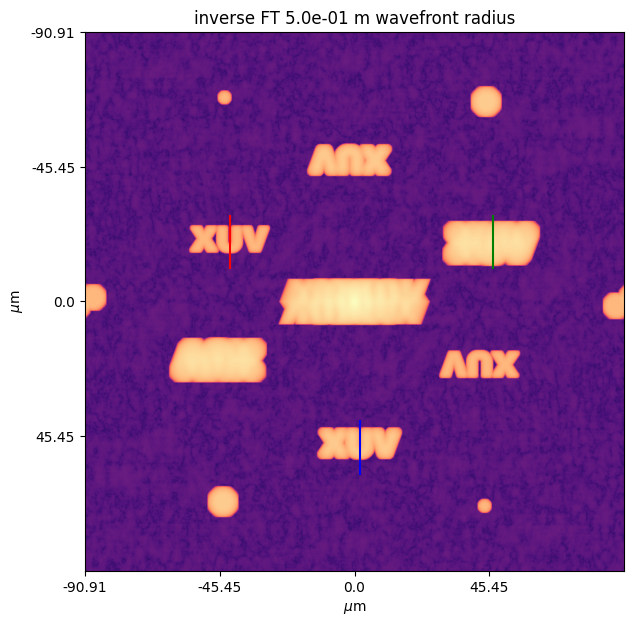

In [15]:
# Use measured intensity to calculate autocorrelation terms
inverseFT = np.sqrt(ifft2c(measured))
# inverseFT = (ifft2c(measured))
# inverseFT = np.sqrt(ifft2c(measured*np.exp(-1j*(2*np.pi/wavelength)*(X**2+Y**2)/(2*Rc))))



plt.figure(figsize=(7,7),dpi=100)
plt.title('inverse FT {:.1e} m wavefront radius'.format(Rc))
# plt.imshow(np.log10(np.sqrt(np.abs(inverseFT))+1), cmap='magma')
plt.imshow(np.log10(np.abs(inverseFT)+1), cmap='magma')
plt.xticks(ticks=np.linspace(0,N,5), labels=np.around(np.linspace(-N//2,N//2,5)*dxo*1e6, decimals=2))
plt.yticks(ticks=np.linspace(0,N,5), labels=np.around(np.linspace(-N//2,N//2,5)*dxo*1e6, decimals=2))
plt.xlabel(r'$\mu$m')
plt.ylabel(r'$\mu$m')
plt.plot(np.ones(200)+550,np.arange(200)+700, color='r' )
plt.plot(np.ones(200)+1045,np.arange(200)+1480, color='b')
plt.plot(np.ones(200)+1550,np.arange(200)+700, color='g' )
plt.show()

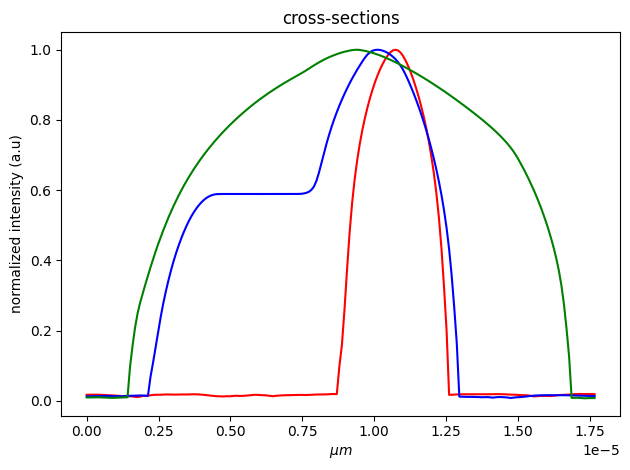

In [16]:
#Extract lineout regions and plot normalized values
# reconstructed = np.log10(np.abs(inverseFT)+1)
reconstructed = np.sqrt(np.abs(inverseFT))
l1 = np.squeeze(reconstructed[700:900,550])
l2 = np.squeeze(reconstructed[1480:1680, 1045])
l3 = np.squeeze(reconstructed[700:900,1550])
#normalize lineouts
l1 /= np.amax(l1)
l2 /= np.amax(l2)
l3 /= np.amax(l3)


plt.figure(dpi=100)
plt.title('cross-sections')
plt.plot(np.arange(200)*dxo, l1, color='r')
plt.plot(np.arange(200)*dxo, l2, color='b')
plt.plot(np.arange(200)*dxo, l3, color='g')
plt.xlabel(r'$\mu m$')
plt.ylabel('normalized intensity (a.u)')
plt.tight_layout()
plt.show()

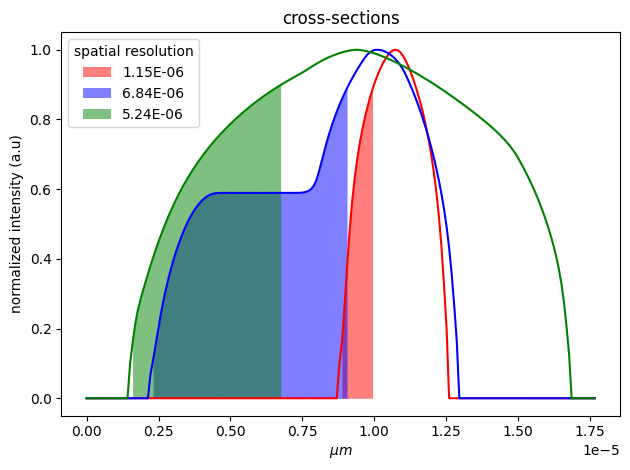

In [44]:
#Criteria for spatial resolution, riseup distance from 10 to 90 % of normalized intensity
a = np.argwhere(l1>0.1)[0]
b = np.argwhere(l1>0.9)[0]
x1 = np.arange(a, b)

a = np.argwhere(l2>0.1)[0]
b = np.argwhere(l2>0.9)[0]
x2 = np.arange(a, b)

a = np.argwhere(l3>0.1)[0]
b = np.argwhere(l3>0.9)[0]
x3 = np.arange(a, b)

plt.figure(dpi=100)
plt.title('cross-sections')
plt.plot(np.arange(200)*dxo, l1, color='r')
plt.fill_between(x1*dxo, l1[x1], color='r', alpha=0.5, linewidth=0, label=f'{len(x1)*dxo:.2E}')
plt.plot(np.arange(200)*dxo, l2, color='b')
plt.fill_between(x2*dxo, l2[x2], color='b', alpha=0.5, linewidth=0, label=f'{len(x2)*dxo:.2E}')
plt.plot(np.arange(200)*dxo, l3, color='g')
plt.fill_between(x3*dxo, l3[x3], color='g', alpha=0.5, linewidth=0, label=f'{len(x3)*dxo:.2E}')
plt.xlabel(r'$\mu m$')
plt.ylabel('normalized intensity (a.u)')
plt.legend(title='spatial resolution')
plt.tight_layout()
plt.show()